In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

import matplotlib.pyplot as plt
import seaborn as sns
import math



In [3]:
data = pd.read_csv('wdbc.dataset', delimiter = ',', header=None, usecols=range(1,32))

In [4]:
data.shape

(569, 31)

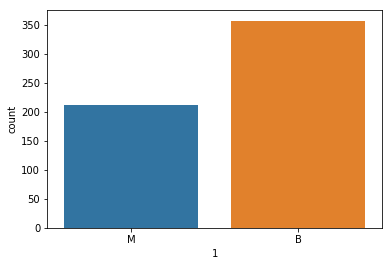

In [5]:
sns.countplot(x=1, data=data)

In [ ]:
data = data.replace({'M':0,'B':1})

# Partitioning target and features

In [ ]:
features = data.drop(1,axis=1)
labels = data[1]

In [ ]:
#features

In [ ]:
#labels

# Normalization 

In [ ]:
features = preprocessing.normalize(features)

# Data Partitioning

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [ ]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset)/len(labels), 2))

In [ ]:
print('Training features shape: ', x_train.shape)
print('Validation features shape: ',x_val.shape)
print('Test features shape: ',x_test.shape)

In [ ]:
print('Training target shape: ', y_train.shape)
print('Validation target shape: ', y_val.shape)
print('Test target shape: ', y_test.shape)

In [ ]:
# print(x_train.shape, y_train.shape)
# print(type(x_train), type(y_train))
# # x_train=x_train.to_numpy()
y_train=y_train.to_numpy()
# print(type(x_train), type(y_train))
y_val= y_val.to_numpy()

In [ ]:
# Initializing weights, biases and learning rate:
X, Y = x_train.T, y_train.reshape(1, y_train.shape[0])


epochs = 1000
learningrate = 0.00000001
losstrack = []
accuracyval = []
accuracyval_val = []
accuracyval_test = []

m = X.shape[1]
w = np.random.randn(X.shape[0], 1)*0.01
b = 0
lossval = []

# Defining sigmoid function:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_(X, w_new, b_new):
    #print('Reached here')
    val = np.dot(X, w_new) + b_new
    z= sigmoid(val)
    #acc = 
    #print(z.shape)
    return z


    

def cost_fun(Y, p, m):
    cal =  -np.sum(np.multiply(np.log(p), Y) + np.multiply((1 - Y), np.log(1 - p)))/m
    return cal 


for epoch in range(epochs):
    if(epoch%100==0):
              print(str(epoch)+'th iteration of '+str(epochs))
    z = np.dot(w.T, X) + b     
    p = sigmoid(z)
#     print('Y: ',Y)
#     print('p: ',p)
#     print('m: ',m)
    cal = cost_fun(Y, p, m)
#     print('cal: ',cal)
    #cost = -np.sum(np.multiply(np.log(p), Y) + np.multiply((1 - Y), np.log(1 - p)))/m
    losstrack.append(np.squeeze(cal))
    dz = p-Y
    #print(dz)
    dw = (1 / m) * np.dot(X, dz.T)
    db = (1 / m) * np.sum(dz)
    w = w - learningrate * dw
    b = b - learningrate * db
    
    # Compute accuracy for each possible representation of training
    #print(np.squeeze(Y.T))
    accu = accuracy_score(np.squeeze(Y.T), np.squeeze(p.round().astype(int).T))
    #print(accu)
#     accuracyval.append(np.squeeze(accu))
    accuracyval.append(accu)
    
    
    
    y_test_pred = predict_(x_test, w, b)
    accu1 = accuracy_score(np.squeeze(y_test.T), np.squeeze(y_test_pred.round().astype(int).T))
#     accuracyval_val.append(np.squeeze(accu1))
    accuracyval_val.append(accu1)
    
    y_val_pred = predict_(x_val, w, b)
#     print('y_val_pred',y_val_pred)
    
    accu2 = accuracy_score(np.squeeze(y_val.T), np.squeeze(y_val_pred.round().astype(int).T))
#     accuracyval_test.append(np.squeeze(accu2))
    accuracyval_test.append(accu2)
    
    # Validation loss vs epoch
    #y_val_pred = predict_(x_val, w, b)
    y_val = y_val.T
    y_val = y_val.reshape(1, y_val.shape[0])
#     print('y_val: ', y_val)
    
    p_val = y_val_pred.T
#     print('p_val: ' , p_val)
    
    m_val = x_val.T.shape[1]
    pred_loss = cost_fun(y_val , p_val , m_val)
    lossval.append(pred_loss)
    

print('Final accuracy for validation:', accu2*100)
print('Final accuracy for Testing:', accu1*100)
print('Final accuracy for Training:', accu*100)



In [ ]:


fig=plt.figure()
# plt.plot(epochs, 'r',label='Epoch')
plt.plot(accuracyval, 'b',label='Training accuracy')
plt.xlabel('Epoch: ' )
plt.ylabel('Training accuracy: '  )    
plt.legend()
fig.savefig('TA1.png')


fig=plt.figure()
# plt.plot(epochs, 'r',label='Epoch')

plt.plot(accuracyval_val, 'r',label='Validation accuracy')
plt.plot(accuracyval, 'b',label='Training accuracy')
plt.xlabel('Epoch: ' )
plt.ylabel('Accuracy: ')    
plt.legend()
fig.savefig('VTA1.png')
    
  
fig=plt.figure()
plt.plot(accuracyval_val, 'b',label='Validation accuracy')
# plt.plot(epochs, accuracyval_val)
plt.xlabel('Epoch: ' )
plt.ylabel('Validation accuracy: ' )    
plt.legend()
fig.savefig('VA1.png')

fig=plt.figure()
plt.plot(losstrack, 'b',label='Training Loss')
plt.xlabel('Epoch: ' )
plt.ylabel('Training Loss: ' )    
plt.legend()
fig.savefig('TL1.png')

fig=plt.figure()
plt.plot(losstrack, 'r',label='Training Loss')
plt.plot(lossval, 'b',label='Validation Loss')
plt.xlabel('Epoch: ' )
plt.ylabel('loss: ' )    
plt.legend()
fig.savefig('VTL1.png')

fig=plt.figure()
plt.plot(lossval, 'b',label='Validation Loss')
plt.xlabel('Epoch: ' )
plt.ylabel('Validation loss: ' )    
plt.legend()
fig.savefig('VL1.png')


# Logically calculated accuracy formula

In [ ]:
correct=0
wrong=0
for p,q in zip(np.squeeze(y_test.T), np.squeeze(y_test_pred.round().astype(int).T)):
    #print(p, int(q))
    if(p==int(q)):
        correct+=1
    else:
        wrong+=1
print('Validation Accuracy ', (correct/(wrong+correct))*100)

In [ ]:
results = confusion_matrix(np.squeeze(y_test.T), np.squeeze(y_test_pred.round().astype(int).T))  #(true, pred)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(np.squeeze(y_test.T), np.squeeze(y_test_pred.round().astype(int).T) ))
print ('Report : ')
print (classification_report(np.squeeze(y_test.T), np.squeeze(y_test_pred.round().astype(int).T)))